Convolution Neural Network is a type of Artificial Neural Network (ANN) used in:
1. Facial recognition
2. object detection in self driving cars
3. Disease detection in health care

CNN works with images, we need to show algorithm a million of pictures before it generalizes the input and make prediction of the images it has not seen before. 

Computer sees an image as a 2d matrix with numers known as pixels. 

### How CNN learns? 
There are 5 major operations in CNN image detection/classification:

1. Convolution and Padding

2. Activation map

3. Max pooling

4. Flattening

5. Fully connected layer
-----

  1. Convolution: The main purpose of a convolutional layer is to detect features or visual features in images such as edges, lines, color drops, etc.

  CNN’s make use of filters (also known as kernels, feature detectors), to detect features, such as edges, are present throughout an image. A filter is just a matrix of values, called weights, that are trained to detect specific features. The filter moves over each part of the image to check if the feature it is meant to detect is present. To provide a value representing how confident it is that a specific feature is present, the filter carries out a convolution operation, which is an element-wise product and sum between two matrices.

  When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.
  
  Size of output matric after convolution= stride*(input size - kernal size) + 1
  stride means how many steps to take by kernal to move in input image for convolution step.
  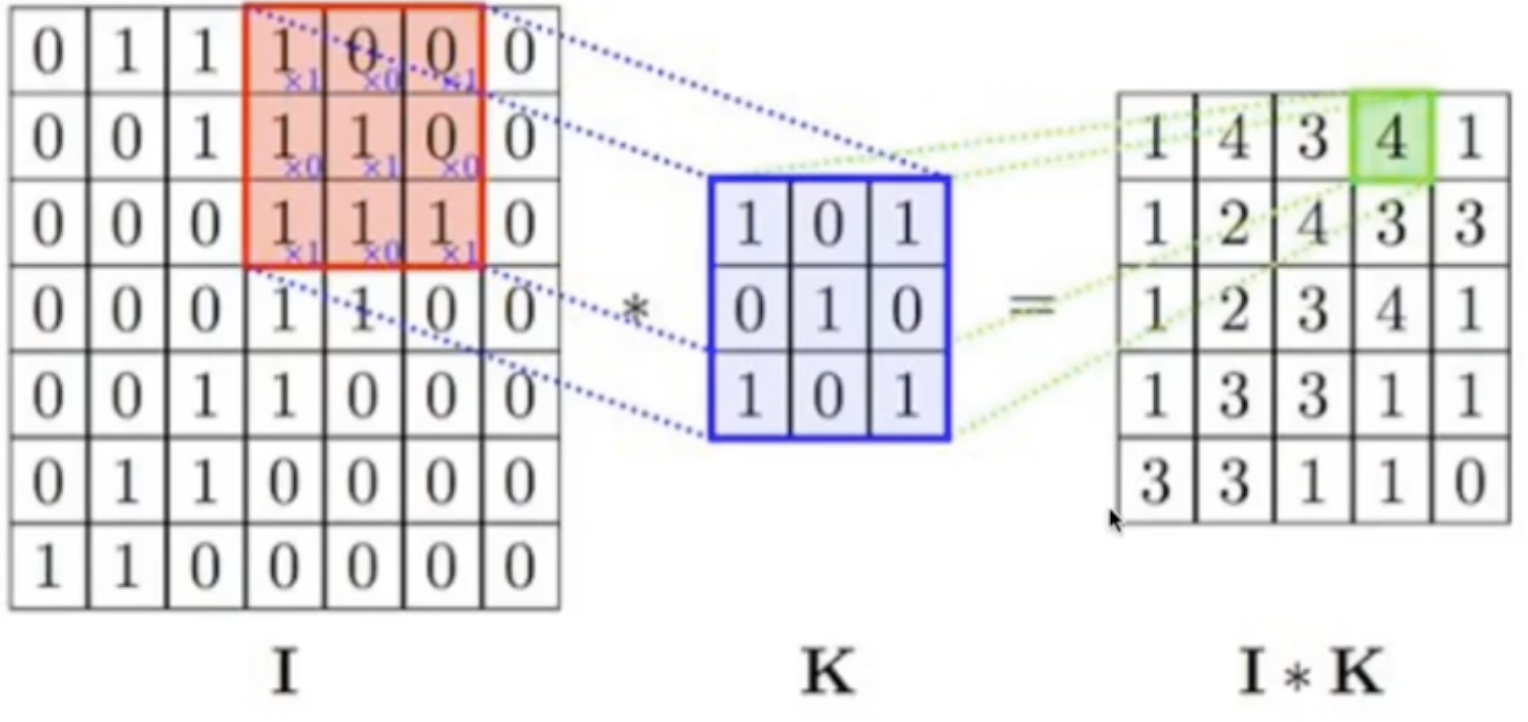

  2. Padding: issue when applying convolutional layers is that we tend to lose pixels on the perimeter of our image. Since we typically use small kernels, for any given convolution, we might only lose a few pixels, but this can add up as we apply many successive convolutional layers.

  Padding refers to the number of pixels added to an image when it is being processed by the kernel of a CNN.
    

3. Activation Function: These feature maps must be passed through a non-linear mapping. The feature maps are summed with a bias term and passed through a non-linear activation function: ReLu. The purpose of the activation function is to introduce non-linearity into our network because the images are made of different objects that are not linear to each other so the images are highly non-linear.


4. Max Pooling: After ReLU comes to a pooling step, in which the CNN downsamples the convolved feature (to save on processing time), while also reducing the size of the image. This helps reduce overfitting, which would occur if CNN is given too much information, especially if that information is not relevant in classifying the image.

      There are different types of pooling, for example, max pooling and min pooling. In max pooling, a window passes over an image according to a set stride value. At each step, the maximum value within the window is pooled into an output matrix, hence the name max pooling.
  

5. Flattening: After multiple convolution layers and downsampling operations, the 3D representation of the image is converted into a feature vector that is passed into a multi-layer perceptron to output probabilities.

6. Fully Connected Layer: In this step, the flattened feature map is passed through a neural network. This step is made up of the input layer, the fully connected layer, and the output layer. The fully connected layer is similar to the hidden layer in ANNs but in this case, it’s fully connected. The output layer is where we get the predicted classes. The information is passed through the network and the error of prediction is calculated. The error is then backpropagated through the system to improve the prediction. 

The final output produced by the dense layer neural network doesn’t usually add up to one. However, these outputs must be brought down to numbers between zero and one, which represent the probability of each class. This is the role of the Softmax function.

The output of this dense layer is therefore passed through the Softmax activation function, which maps all the final dense layer outputs to a vector whose elements sum up to one

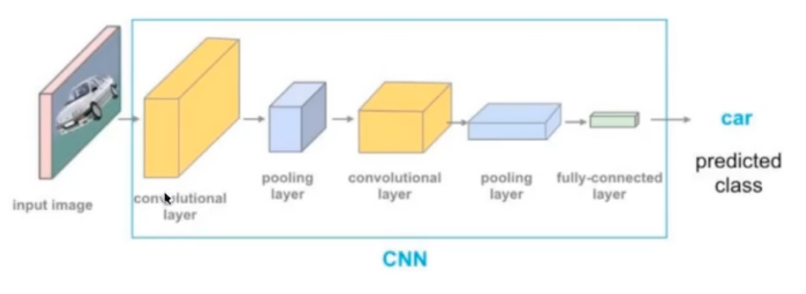

### Building the CNN model: 
CNN with the below-mentioned layers:

1. Sequential is used to initialize the neural network.

2. Convolution2D is used to make the convolutional network that deals with the images.

3. MaxPooling2D layer is used to add the pooling layers.

4. Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer.

5. Dense adds the fully connected layer to the neural network.

Once the network is built, then compile/train the network using Stochastic Gradient Descent(SGD). Gradient Descent works fine when we have a convex curve. But if we don’t have a convex curve, Gradient Descent fails. Hence, in Stochastic Gradient Descent, few samples are selected randomly instead of the whole data set for each iteration

#### Fitting the CNN to the images

Perform Image Augmentation instead of training your model with lots of images we can train our model with fewer images and training the model with different angles and modifying the images. Keras has this ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way.

In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In this notebook, we are considering numticlass-classification problem in which input would be  image and output would be the class of image
#### For CNN we need to decide:
1. Activation function for output layer - 'softmax'
2. Optimizer - 'adam'
3. Loss function - 'sparse_categorical_crossentropy'
4. Evaluation matrix - 'accuracy'

#### About the data: 
We have classification data which is available on keras.datasets cifar10
Input: 32*32*3 image of height 32, width 32 and channel 3 (red, blue, green)

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

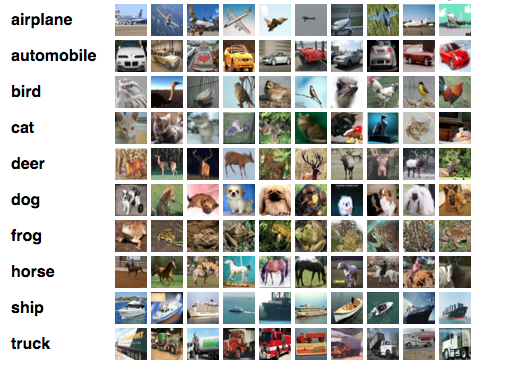


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
type(X_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
classes = ['airplane', 'automobile', 'birds', 'cats', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [11]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [12]:
y_train.shape

(50000,)

In [13]:
y_train[90]

2

Text(0.5, 1.0, 'birds')

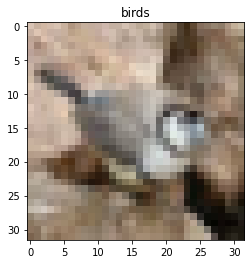

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[90])
plt.title(classes[y_train[90]])


Lets first apply ANN on this image data and see how it works. 
ANN takes 1-d data and our data is in 4-d so we need to reshape it

In [15]:
#reshape 50,000 images into shape of each image = 32*32*3 = height * weidth * channel 
X_train_reshape = X_train.reshape(X_train.shape[0], 32*32*3)
X_test_reshape = X_test.reshape(X_test.shape[0], 32*32*3)

In [16]:
X_train_reshape.shape, X_test_reshape.shape

((50000, 3072), (10000, 3072))

In [17]:
X_train_reshape.min(), X_train_reshape.max()

(0, 255)

Now we need to normalize the data into range 0-1, so that convergence of Loss function would be faster 

In [18]:
X_train_reshape_n = X_train_reshape/255
X_test_reshape_n = X_test_reshape/255

In [19]:
X_train_reshape_n.min(), X_train_reshape_n.max()

(0.0, 1.0)

In [20]:
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense
#1. Disadvantage of using ANN is that at input layer will be of shape 3072 becasue each image
#is of size 3072 (we need to use 3072 neurons at input layer) which is computationaly 
#expensive so many number of input layers we need to put because each image is of shape 3072, so we need
#3072 input layers with each layer of shape 3072 
ann_model = keras.Sequential([
    InputLayer(input_shape=(X_train_reshape_n.shape[1])), 
    Dense(2500, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])


𝐽(𝐰)=−(1/𝑁)∑(𝑖=1 to 𝑁) [𝑦𝑖log(𝑦̂ 𝑖) + (1−𝑦𝑖)log(1−𝑦̂ 𝑖)]
 
where,

𝐰 refer to the model parameters, e.g. weights of the neural network
𝑦𝑖 is the true label
𝑦𝑖^ is the predicted label

Both, categorical cross entropy and sparse categorical cross entropy have the same loss function mentioned above. The only difference is the format of 𝑌𝑖 (i,e true labels).

If 𝑌𝑖's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your 𝑌𝑖's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

In [21]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2500)              7682500   
                                                                 
 dense_1 (Dense)             (None, 1000)              2501000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 10,193,510
Trainable params: 10,193,510
Non-trainable params: 0
_________________________________________________________________


From above summary we can see that there are a lot 10,184,501 of parameters to train. It is very time consuming and memory intensive process to use ANN for such data. 

In [23]:
ann_model_hist = ann_model.fit(X_train_reshape_n, y_train, epochs=6, batch_size=100,
                               validation_data=(X_test_reshape_n, y_test))

Epoch 1/6
500/500 [==============================] - 14s 28ms/step - loss: 1.8986 - accuracy: 0.3276 - val_loss: 1.7649 - val_accuracy: 0.3864
Epoch 2/6
500/500 [==============================] - 13s 27ms/step - loss: 1.7278 - accuracy: 0.3959 - val_loss: 1.7227 - val_accuracy: 0.3928
Epoch 3/6
500/500 [==============================] - 14s 27ms/step - loss: 1.6563 - accuracy: 0.4194 - val_loss: 1.6260 - val_accuracy: 0.4294
Epoch 4/6
500/500 [==============================] - 13s 26ms/step - loss: 1.6045 - accuracy: 0.4391 - val_loss: 1.6163 - val_accuracy: 0.4351
Epoch 5/6
500/500 [==============================] - 14s 28ms/step - loss: 1.5668 - accuracy: 0.4515 - val_loss: 1.5564 - val_accuracy: 0.4531
Epoch 6/6
500/500 [==============================] - 13s 27ms/step - loss: 1.5326 - accuracy: 0.4639 - val_loss: 1.5431 - val_accuracy: 0.4610


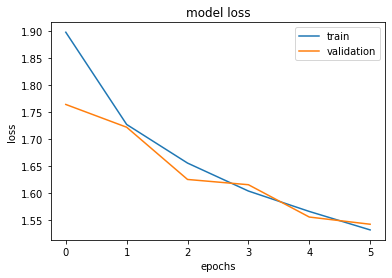

In [24]:
plt.plot(ann_model_hist.history['loss'], label='train')
plt.plot(ann_model_hist.history['val_loss'], label = 'validation')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

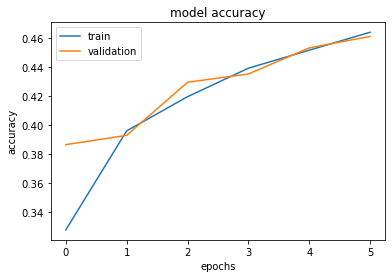

In [25]:
plt.plot(ann_model_hist.history['accuracy'], label='train')
plt.plot(ann_model_hist.history['val_accuracy'], label = 'validation')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
# Lets try training model with optimizer as adam and setting learning rate 
from tensorflow.keras.optimizers import Adam
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])


In [27]:
ann_model_hist = ann_model.fit(X_train_reshape_n, y_train, epochs=6, batch_size=100,
                               validation_data=(X_test_reshape_n, y_test))

Epoch 1/6
500/500 [==============================] - 20s 40ms/step - loss: 1.4793 - accuracy: 0.4858 - val_loss: 1.4939 - val_accuracy: 0.4780
Epoch 2/6
500/500 [==============================] - 22s 43ms/step - loss: 1.4559 - accuracy: 0.4965 - val_loss: 1.4922 - val_accuracy: 0.4727
Epoch 3/6
500/500 [==============================] - 22s 45ms/step - loss: 1.4329 - accuracy: 0.5036 - val_loss: 1.4782 - val_accuracy: 0.4807
Epoch 4/6
500/500 [==============================] - 21s 41ms/step - loss: 1.4113 - accuracy: 0.5119 - val_loss: 1.4552 - val_accuracy: 0.4876
Epoch 5/6
500/500 [==============================] - 20s 39ms/step - loss: 1.3907 - accuracy: 0.5172 - val_loss: 1.4443 - val_accuracy: 0.4937
Epoch 6/6
500/500 [==============================] - 21s 43ms/step - loss: 1.3713 - accuracy: 0.5276 - val_loss: 1.4245 - val_accuracy: 0.4951


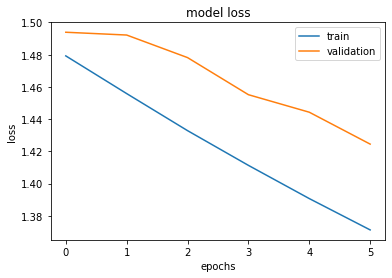

In [28]:
plt.plot(ann_model_hist.history['loss'], label='train')
plt.plot(ann_model_hist.history['val_loss'], label = 'validation')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

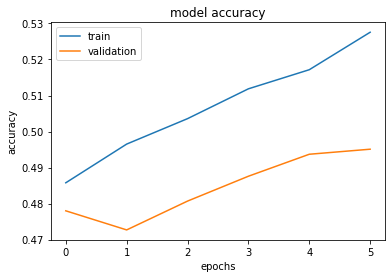

In [29]:
plt.plot(ann_model_hist.history['accuracy'], label='train')
plt.plot(ann_model_hist.history['val_accuracy'], label = 'validation')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### CNN architecture to implement: 
1. Model: Sequential 
2. add 2 Conv2D layers
    - Inside 1st: 
        'filter size' 32
        'kernel size' 3*3
        activation: relu
        input shape: 32 * 32 *3
        Maxpooling2d (2, 2)
    - Inside 2nd layer: 
        'filter size' 64
        kernel size 3*3
        activation relu
        Maxpool2d (2*2)
3. One flatten layer
4. 2 dense layer one is input one is output layer with activation=relu, softmax

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [37]:
cnn_model = keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') ])

In [40]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [41]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [42]:
cnn_model_hist = cnn_model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

Epoch 1/4
1563/1563 [==============================] - 36s 23ms/step - loss: 5.0196 - accuracy: 0.1931 - val_loss: 3.0872 - val_accuracy: 0.2565
Epoch 2/4
1563/1563 [==============================] - 35s 22ms/step - loss: 2.6655 - accuracy: 0.2845 - val_loss: 2.3466 - val_accuracy: 0.3101
Epoch 3/4
1563/1563 [==============================] - 35s 22ms/step - loss: 2.1669 - accuracy: 0.3422 - val_loss: 2.0322 - val_accuracy: 0.3624
Epoch 4/4
1563/1563 [==============================] - 35s 23ms/step - loss: 1.9122 - accuracy: 0.3875 - val_loss: 1.8660 - val_accuracy: 0.3970


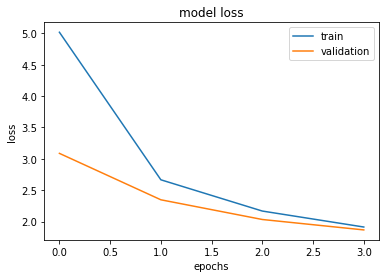

In [43]:
plt.plot(cnn_model_hist.history['loss'], label='train')
plt.plot(cnn_model_hist.history['val_loss'], label = 'validation')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

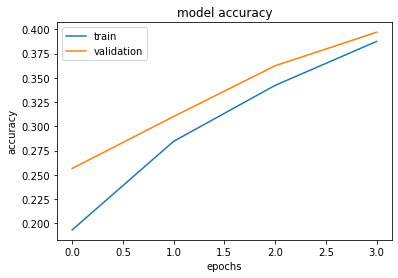

In [44]:
plt.plot(cnn_model_hist.history['accuracy'], label='train')
plt.plot(cnn_model_hist.history['val_accuracy'], label = 'validation')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()